# Morse Coefficient Optimization
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y", localtime (time ())))

Last updated: Sunday  8 December 2019

In [65]:
# inpAngle is a column vector, 0 <= theta <= pi, length m
# soundSilence is a row vector, 0 or 1s, length 2m + 1
function cost = costAny(inpAngle, soundSilence)
  # take first m angles, as row vector
  mAngle = inpAngle(:)';
  # Make a test vector where the back half is a mirror and congugate of the front half
  test = soundSilence .* [ exp(j .* mAngle), 1, exp(-j .* flip(mAngle)) ];
  cost = max(abs(conv(test,flip(test))))/(soundSilence * soundSilence');
endfunction

In [60]:
function soundSilence = makeMorseSoundSilence(message)
    baseCoeff = alphaToMorse(message);
    soundSilence = horzcat(baseCoeff, [ 0 0 0 0 0 0 0 ], flip(baseCoeff));
    sz = columns(soundSilence);
    # See if needs padding
    if (sz < 551)
        half = (551 - sz)/2;
        soundSilence = horzcat(zeros(1,half), baseCoeff, [ 0 0 0 0 0 0 0 ], flip(baseCoeff), zeros(1,half));
    endif        
endfunction

In [5]:
ss = makeMorseSoundSilence("QRG DE VA3TYB VA3TYB?");

In [6]:
columns(ss)

ans =  551


In [8]:
floor(columns(ss)/2)

ans =  275


In [67]:
costAny(pi .* rand(floor(columns(ss)/2), 1), ss)

ans =  0.31560


In [43]:
h = [];
for k=1:100000
  h(end + 1) = costAny(pi .* rand(floor(columns(ss)/2), 1), ss);
end

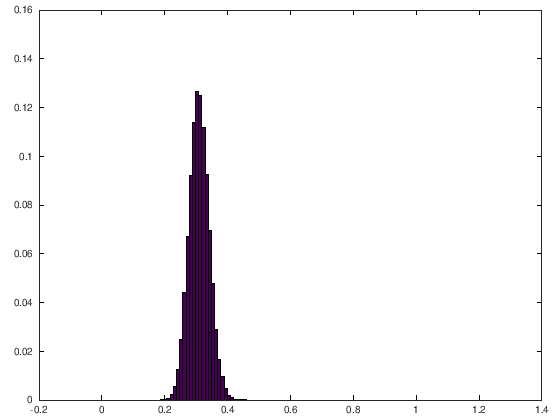

In [45]:
hist(h, linspace(0,1,100), 1)


In [51]:
pkg load optim

In [68]:
m = floor(columns(ss)/2);
ssHalf = ss(1:m);

# t_init = .2;
# t_min = .002;
# mu_t = 1.002;
init_p = pi .* rand(m, 1) .* ssHalf';
max_rand_step = pi/100 .* ones(m, 1);
# Not varying all the parameters
fixed = not(logical(ssHalf))';
lbound = zeros(m, 1);
ubound = pi .* ones(m, 1);
[p, objf, cvg] = nonlin_min (@ (p) costAny(p, ss), init_p, optimset ("Algorithm", "samin", 
"max_rand_step", max_rand_step, 
# "T_init", t_init, 
# "T_min", t_min, 
"fixed", fixed,
"lbound", lbound,
"ubound", ubound,
# "mu_t", mu_t
"Display", "iter"
));


temperature no. 1: 1.000000e-01, energy 2.793685e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4776 / 6331 / 293 / 5778 / 31
temperature no. 2: 8.333333e-02, energy 3.242075e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4667 / 6403 / 330 / 5623 / 1
temperature no. 3: 6.944444e-02, energy 3.115087e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4661 / 6333 / 406 / 5648 / 4
temperature no. 4: 5.787037e-02, energy 2.728076e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4632 / 6295 / 473 / 5678 / 1
temperature no. 5: 4.822531e-02, energy 2.409991e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4454 / 6383 / 563 / 5710 / 0
temperature no. 6: 4.018776e-02, energy 2.760063e-01,
tries with energy less / not less but accepted / rejected: / to far / new optimum
4547 / 6171 / 682 / 5767 / 0
temperatu

In [70]:
p

p =

   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.03340
   1.04357
   0.81724
   0.00000
   0.00000
   0.00002
   0.00001
   0.00000
   0.00000
   0.00000
   0.00000
   0.44165
   0.00000
   0.00000
   0.00000
   0.00000
   1.63023
   0.00000
   0.00000
   1.55725
   0.00000
   0.00000
   0.52404
   0.00000
   0.00000
   0.00000
   3.14159
   1.52508
   0.00001
   0.00000
   0.00000
   0.00002
   1.23510
   0.00000
   1.31133
   0.00000
   0.00000
   0.

In [71]:
cvg


cvg =  1


In [72]:
objf

objf =  0.035157


In [73]:
costAny(p, ss)

ans =  0.035157


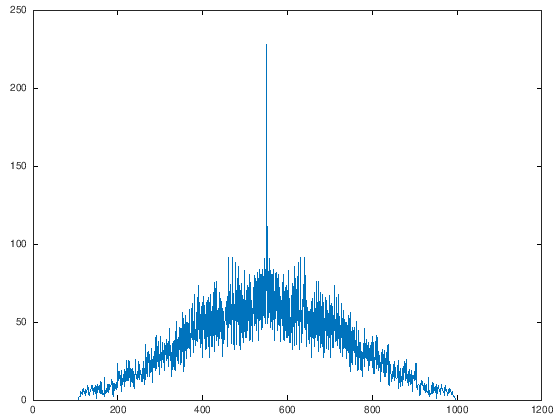

In [74]:
  mAngle = p(:)';
  # Make a test vector where the back half is a mirror and congugate of the front half
  test = ss .* [ exp(j .* mAngle), 1, exp(-j .* flip(mAngle)) ];
plot(abs(conv(test,test)))

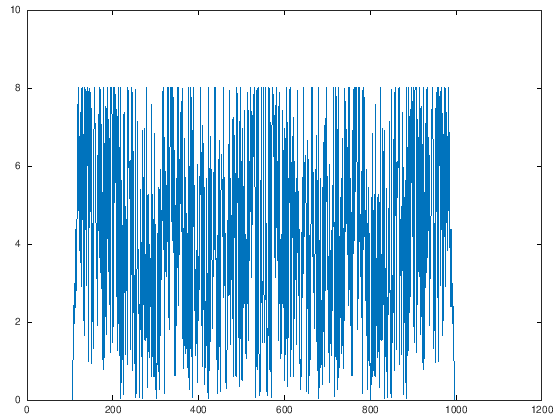

In [76]:
plot(abs(conv(test,flip(test))))